# PyTorch Workflow Fundamentals

* Notebook coded by Adam Lang as part of the `Deep Learning with PyTorch bootcamp` with Professor Daniel Bourke
* Date: 3/8/2024





`This is the basic workflow framework we are going to cover:`

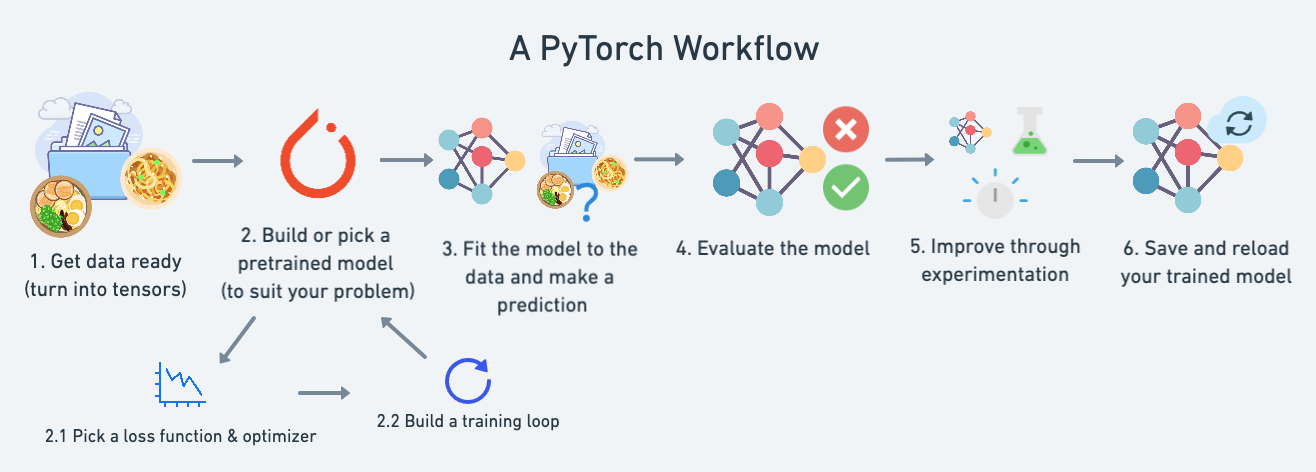

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}


what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

# Quick review before we start
1. What is `torch.nn`
* "These are the basic building blocks for graphs"
* see torch docs: https://pytorch.org/docs/stable/nn.html#module-torch.nn

2. What is a `graph`?
* A `computational graph` or essentially a `neural network`!
* Example:

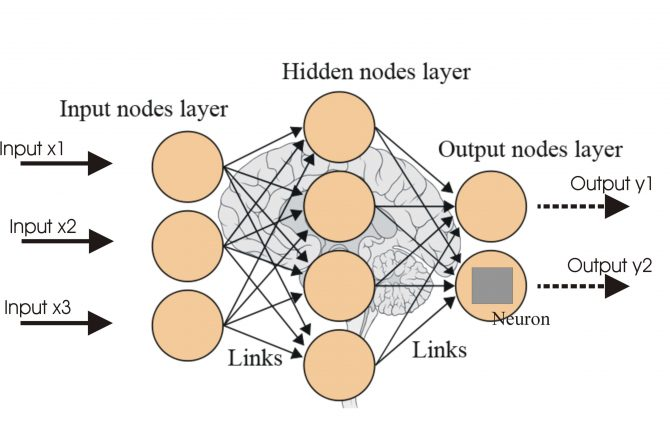

Torch nn has multiple layers as every nn does
* We will build nn's in PyTorch as seen above

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#check PyTorch version
torch.__version__

'2.1.0+cu121'

# 1. Data (preparing and loading)

Data can be almost anything...in machine learning:
* Excel spreadsheet (tabular data)
* Images of any kind
* Videos (YouTube has lots of data!)
* Audio (songs or podcasts)
* DNA
* Text

Machine learning and Deep Learning is a game of 2 parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.
image source: https://www.learnpytorch.io/01_pytorch_workflow/




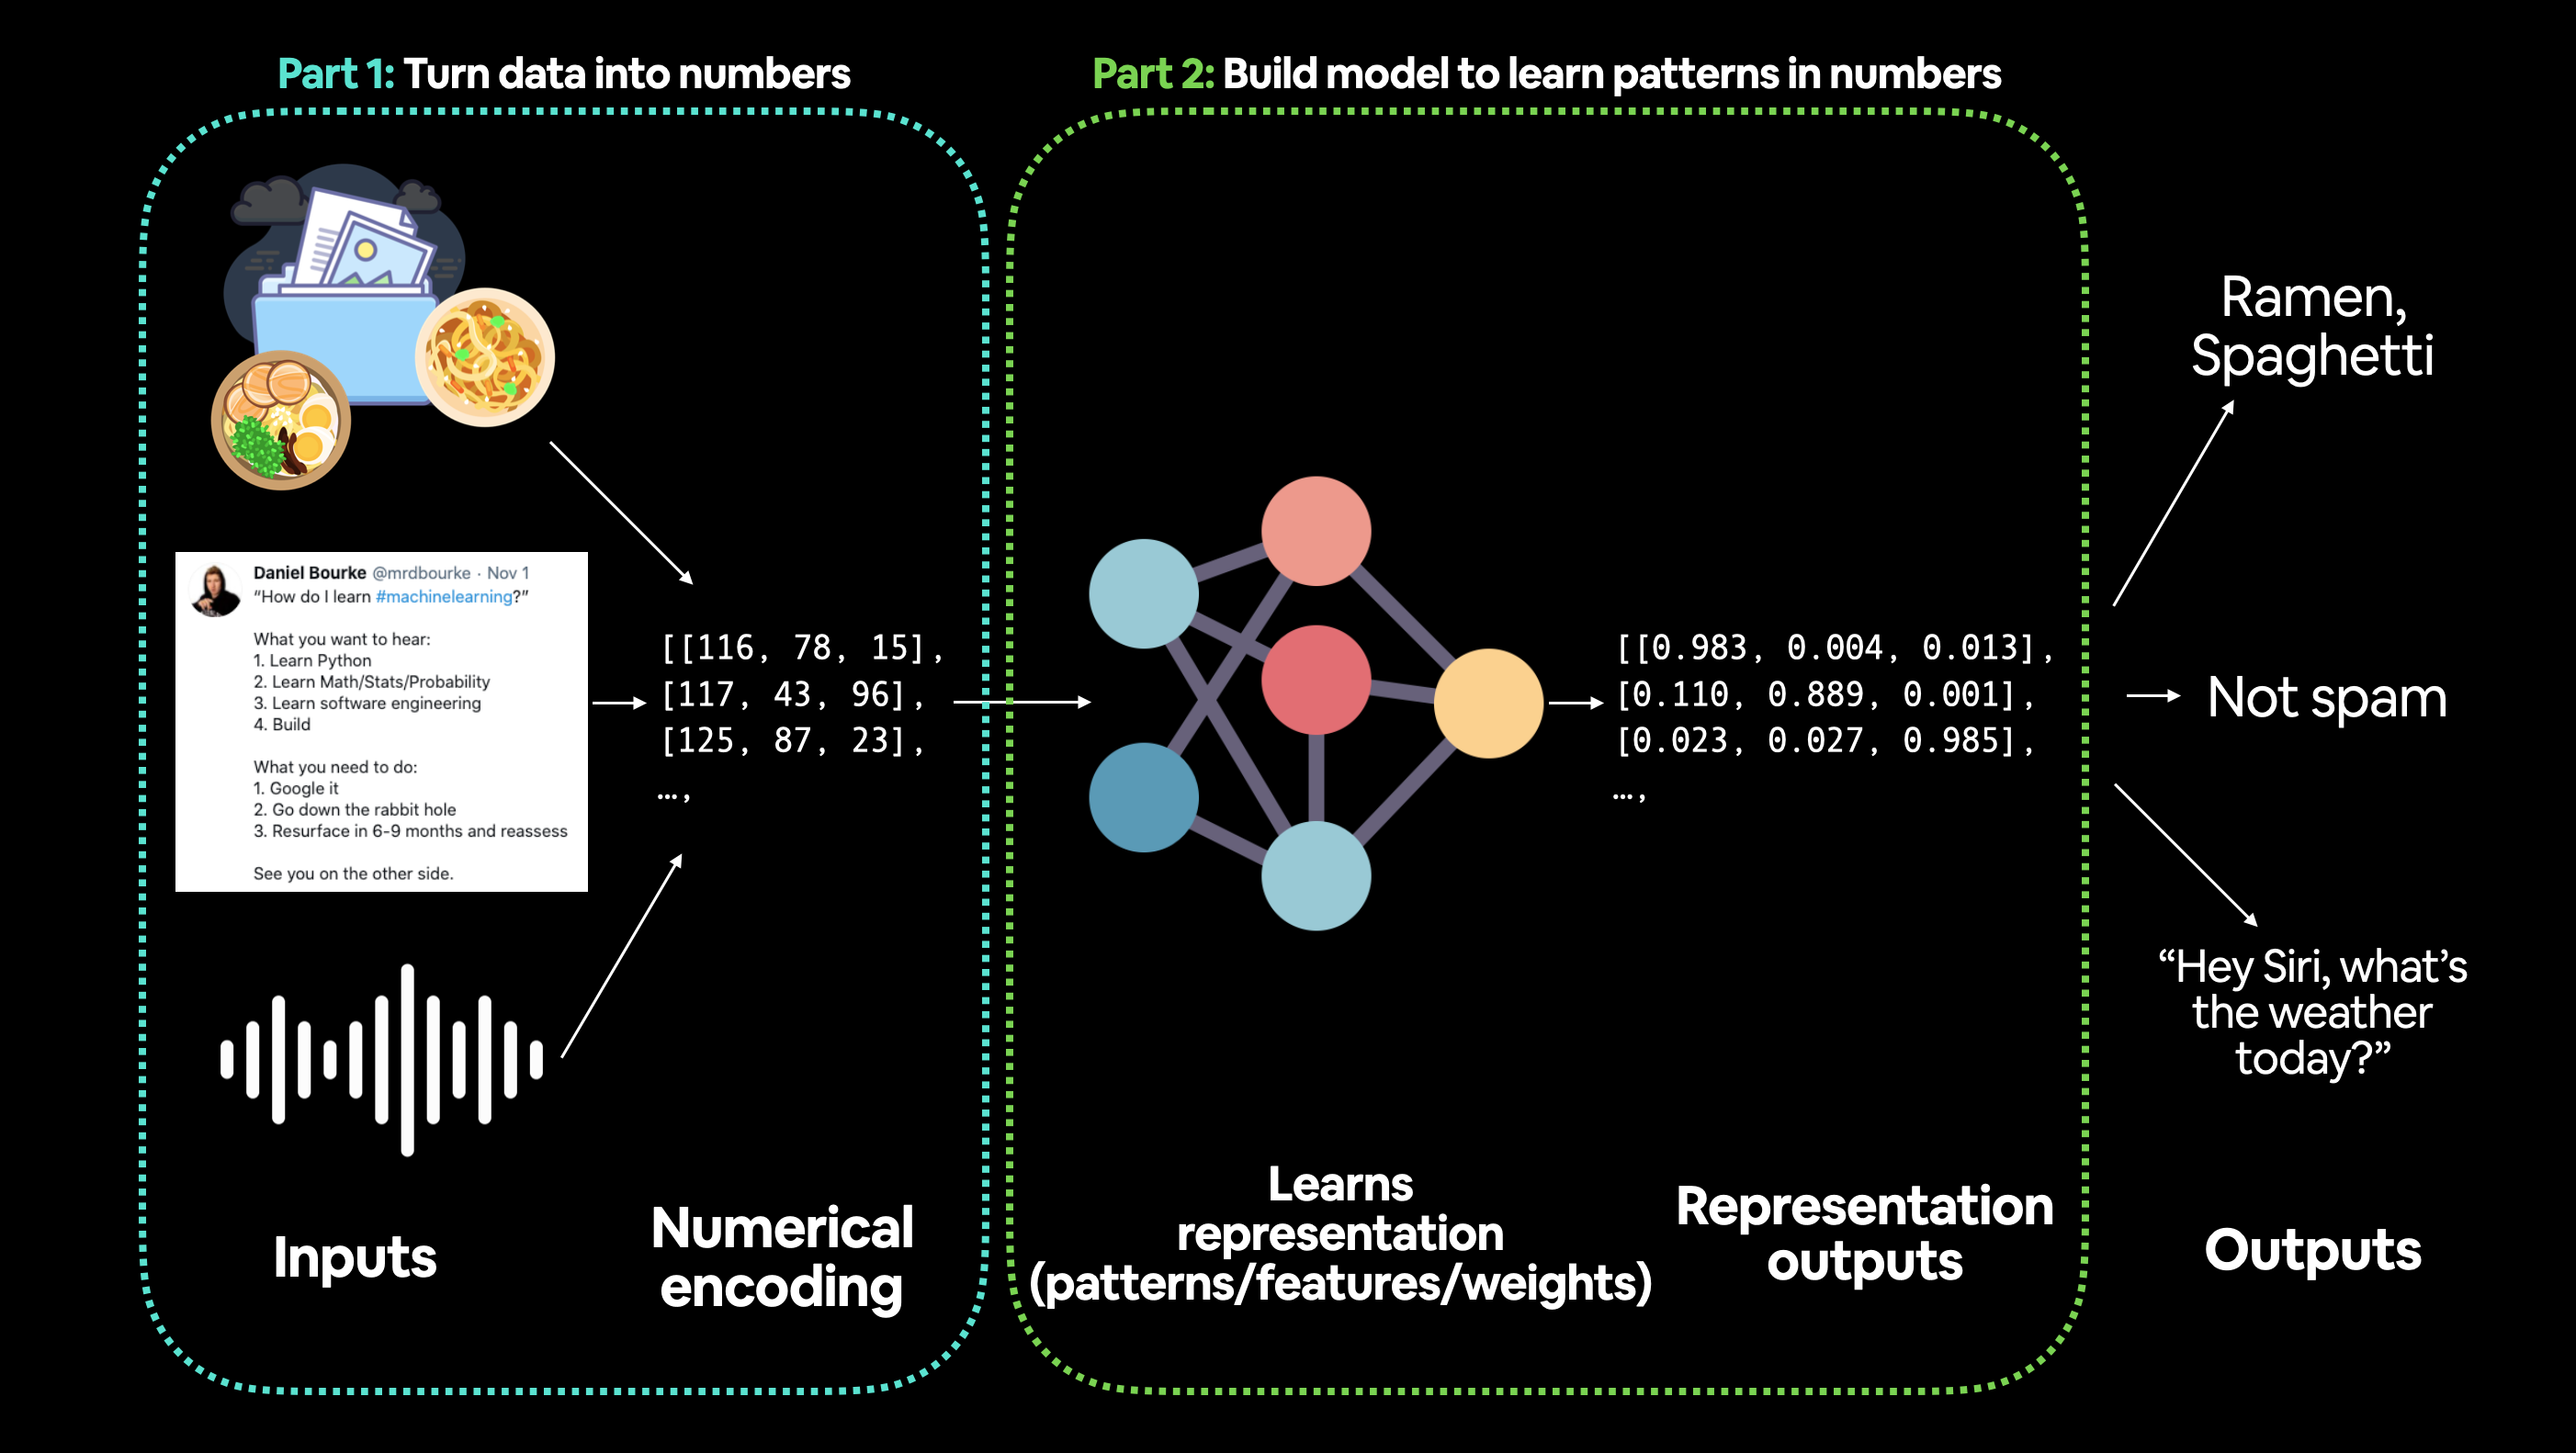

To showcase this, let's create some *known* kata using the `linear regression` formula.

We'll use a `linear regression` formula to make a straight line with *known* **parameters**.

A linear regression line has an equation of the form `Y = a + bX`, where:
* X is the explanatory variable
* Y is the dependent variable
* The slope of the line is b (**slope also known as gradient**)
* a is the intercept (the value of y when x = 0).
source: http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm
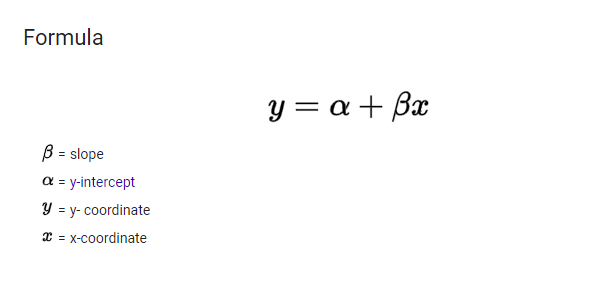


In [3]:
# Create *known* parameters
# weight is 'b', bias is 'a'[ y = a + Bx ]
weight = 0.7
bias = 0.3

# Create data or range of nums, X is a tensor in this case, could be a matrix though
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) #input, unsqueeze adds extra dimension of 1
y = weight * X + bias


# look at len of X, len of y
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets
* One of the MOST important concepts in machine learning/deep learning!!

Visual borrowed from Professor Daniel Bourke:


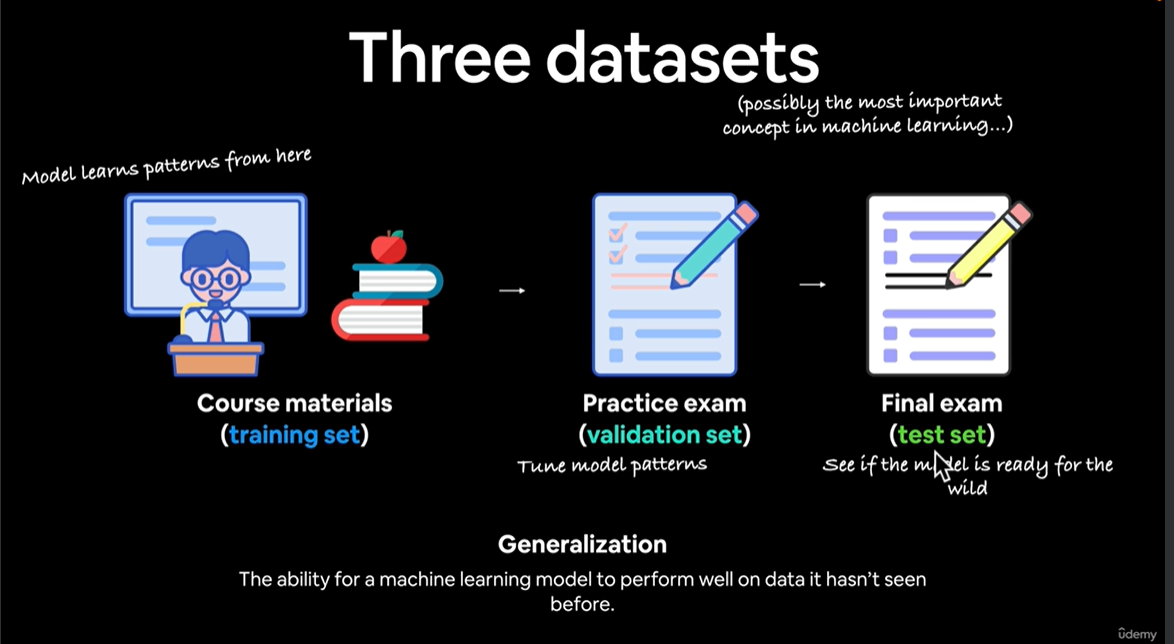


General concept broken down (table borrowed from Professor Daniel Bourke):

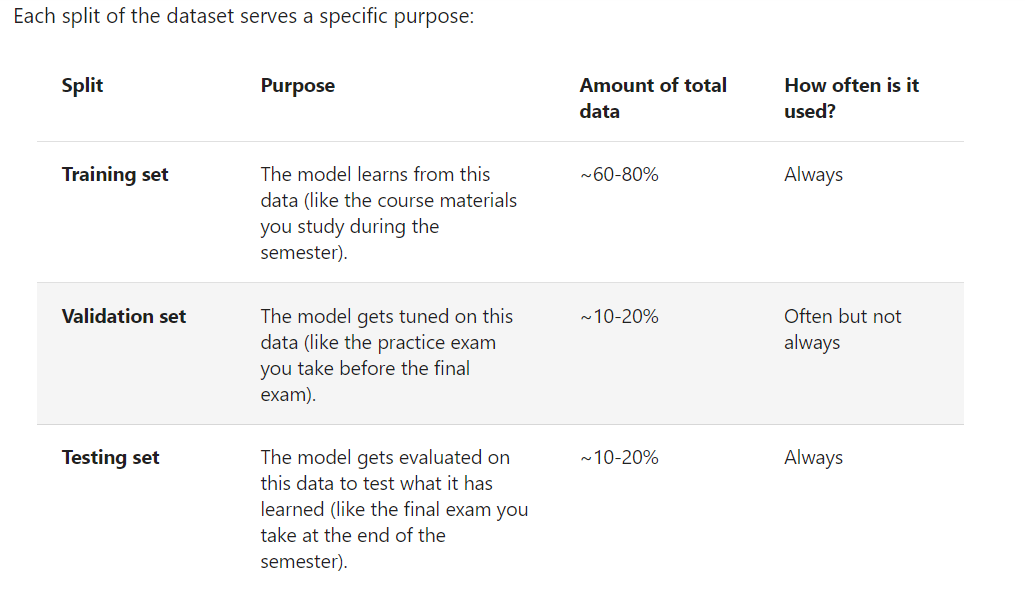

### Create training and test set with our data

In [5]:
# Create a train/test split at 80% len of X
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# How might we visualize our data?

This is where the "data explorers motto comes in!

"Visualize, Visualize, Visualize!"

In [6]:
# write function to visualize predictions
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """ Plots training data, test data, and compares predictions."""

  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

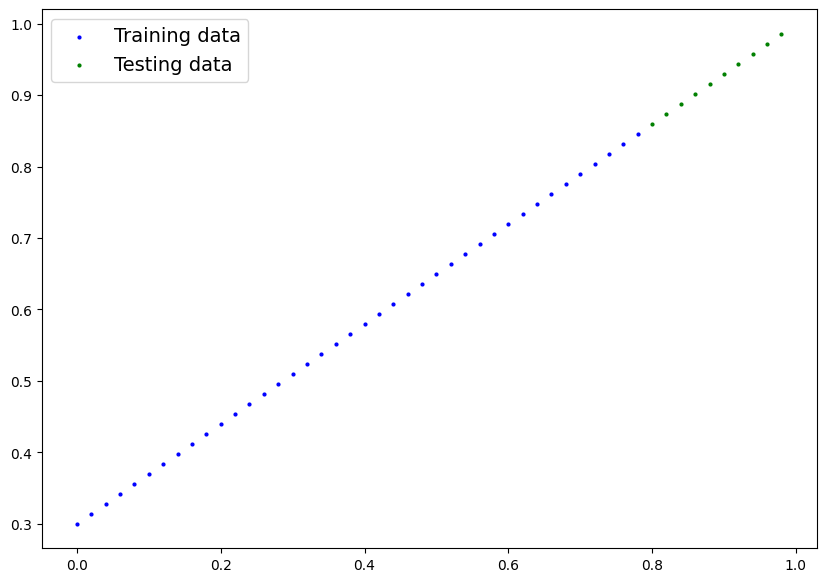

In [7]:
# test out plot prediction function
plot_predictions();

# Building a PyTorch Model


CLASS torch.nn.module(*args,**kwargs)
- base class for all neural network modules.
- All models should subclass this class.
documentation: https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module


What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias we used to create the data)

How does it do so?
* Through 2 main algorithms
1. Gradient Descent
2. Back Propogation

This is what we created below:

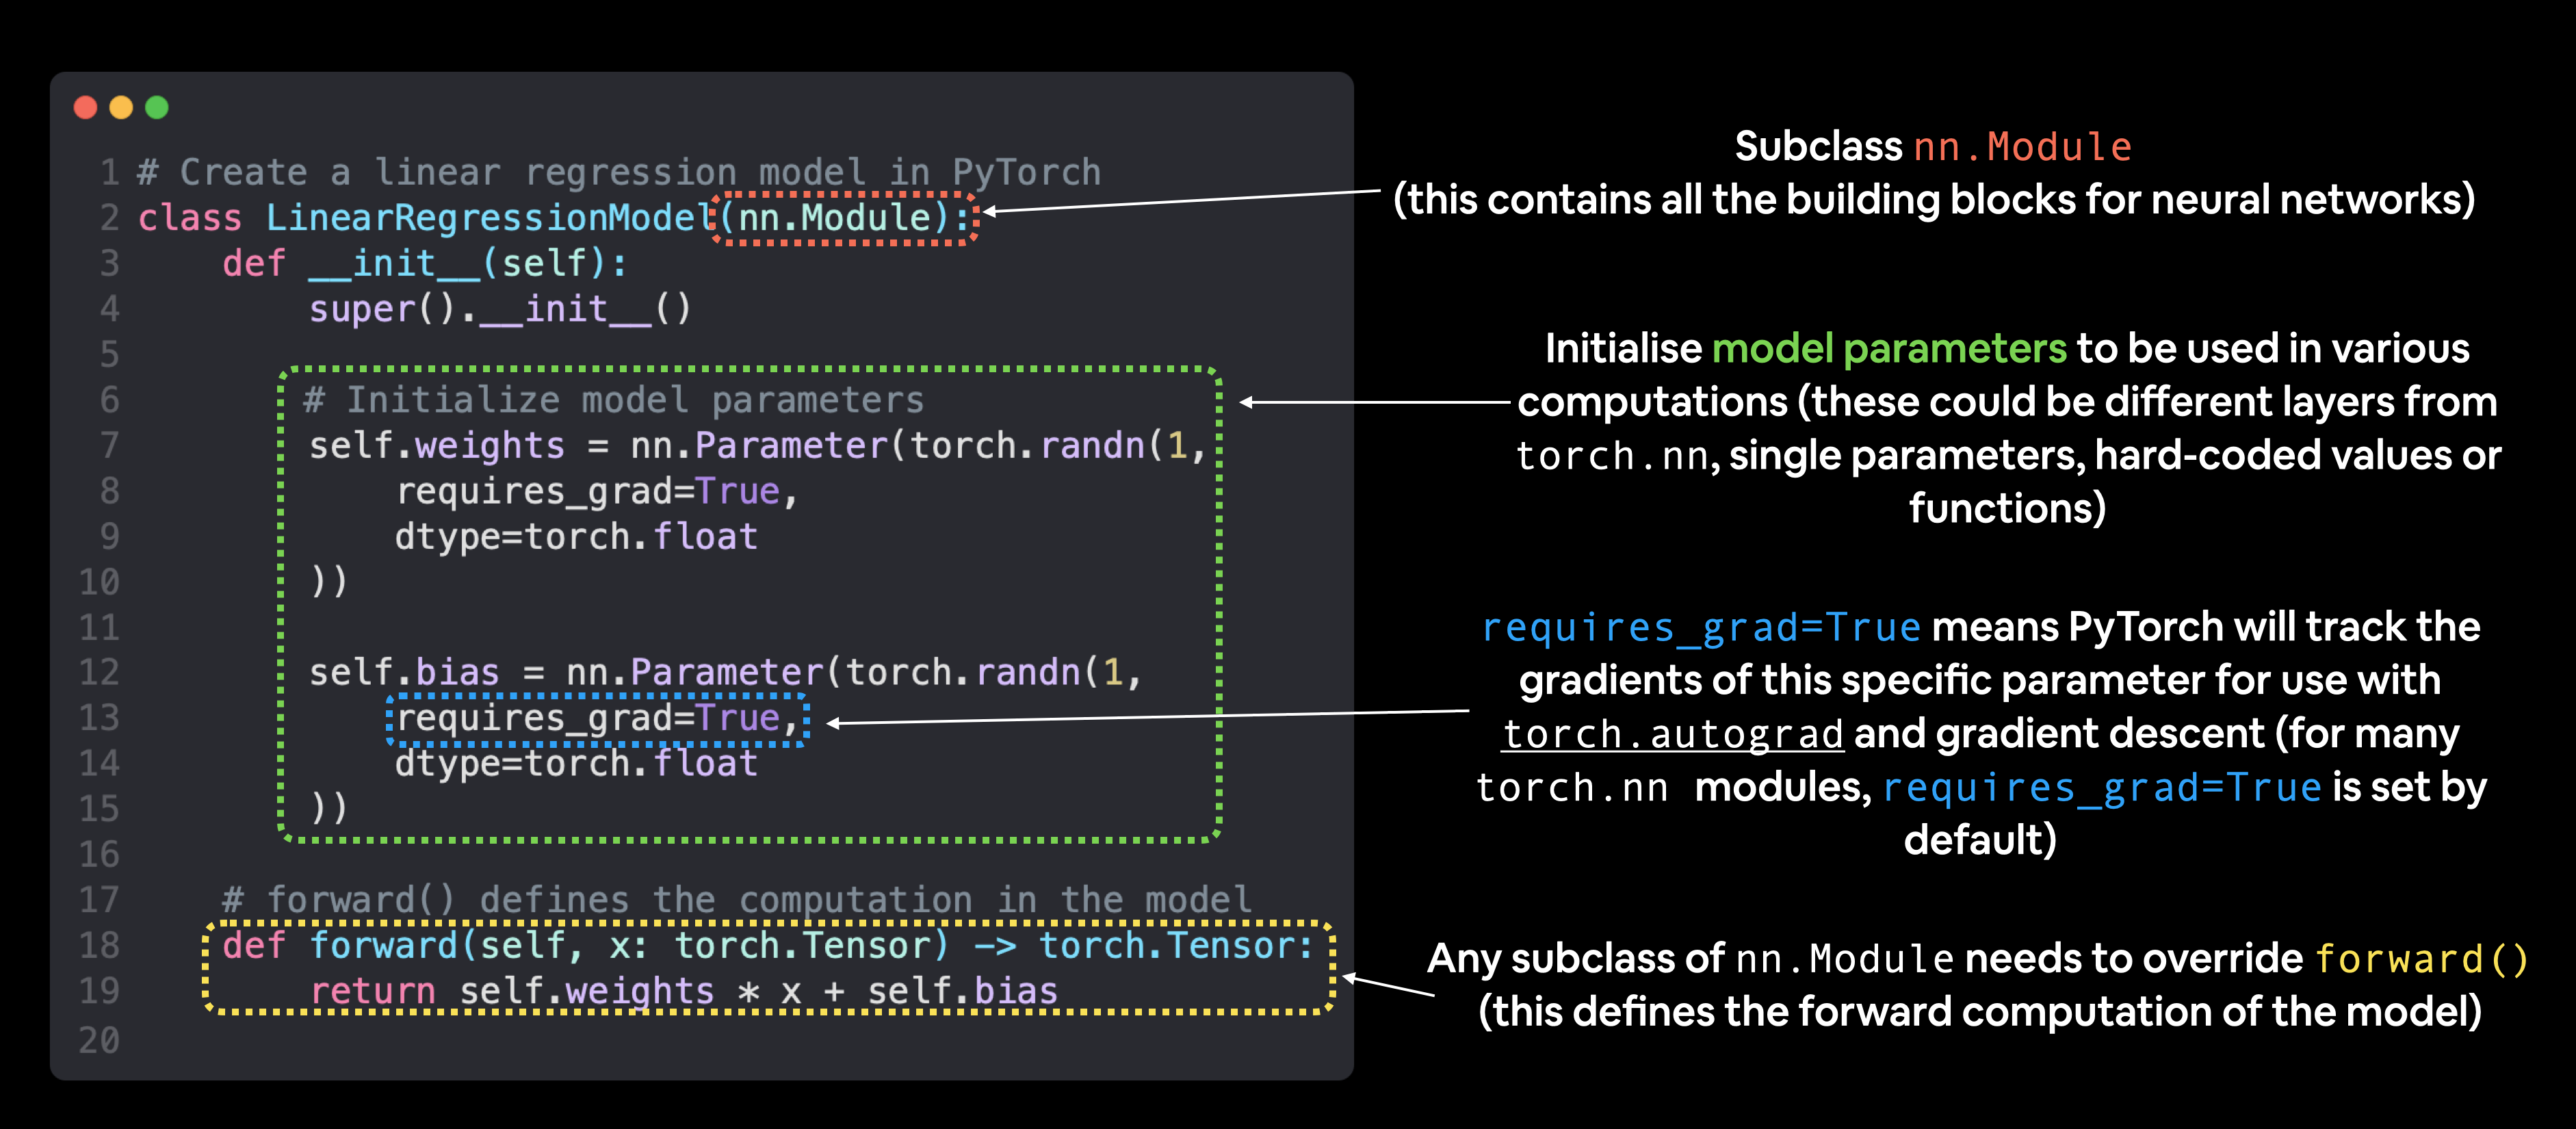

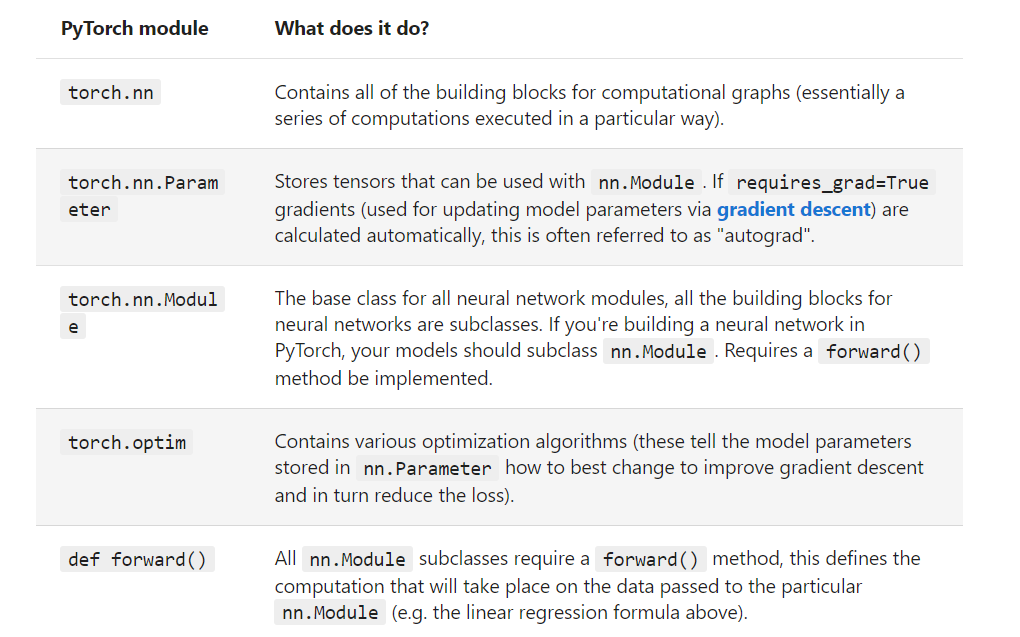

If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from `torch.nn`:

1. `nn.Module` contains the larger building blocks (layers)
2. `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
3. `forward()` tells the larger blocks how to make calculations on **inputs** (tensors full of data) within `nn.Module(s)`
4. `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

In [8]:
import torch

Note about model below:
1. If you are going to inherit from `nn.Module` you need to define at least the `forward()` method to define what computation you are using in the model

In [9]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True, #gradient descent algorithm
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    # Forward propagation method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula

PyTorch Model Building Essentials

* `torch.nn` - contains all building blocks for computation graphs (a neural network can be considered a computational graph)
* `torch.nn.parameter` - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* `torch.nn.Module` - base class for all neural network modules, if you subclass it, you should overwrite `forward()`
* `torch.optim` - this is where the optimizers in PyTorch live, they will help with `gradient descent`
* `def forward()` - All `nn.Module` subclasses require you to overwrite `forward()`, this method defines what happens in the forward computation.

PyTorch Cheat Sheet for quick start: https://pytorch.org/tutorials/beginner/ptcheat.html

In [10]:
# experiment by changing torch.randn()
# now add manual_seed
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [11]:
import torch

In [12]:
# create random seed so code is reproducible
torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# check out parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

Summary:
* initialized our model with random values
* ideal model will adjust the random values as it trains.
* To get reproducible results you need to always utilize `torch.manual_seed()`

In [13]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

summary:
* Weights
* Bias

In [14]:
# weight, bias
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

* To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.

* When we pass data through our model, it's going to run it through the `forward()` method

In [15]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

ideal model:
* takes input tensor values
* outputs tensor values

In [16]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

Summary:
* Notice the above output uses the gradient descent function.
* The `inference_mode()` function turns off the gradients.
* With `inference_mode()` PyTorch is keeping track of less data "under the hood".
* Twitter post about this: https://twitter.com/PyTorch/status/1437838231505096708?lang=en


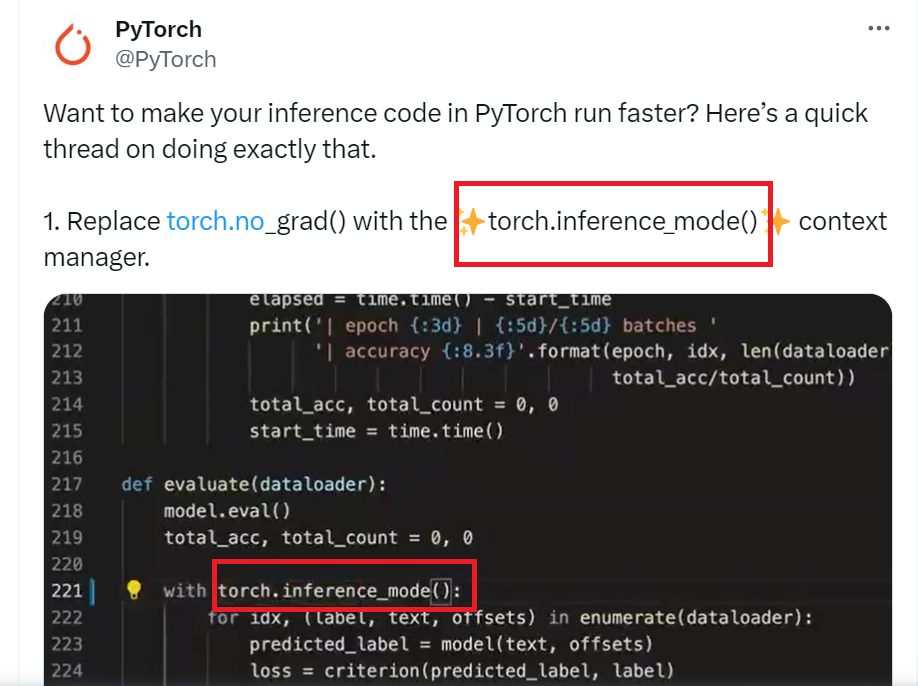

In [17]:
# example with torch.no_grad() -> torch.inference_mode() is preferred..
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [18]:
# make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test) # run test data through forward method

# output y_preds
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [19]:
#print y_test
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

### Plot predictions from LinearRegression()

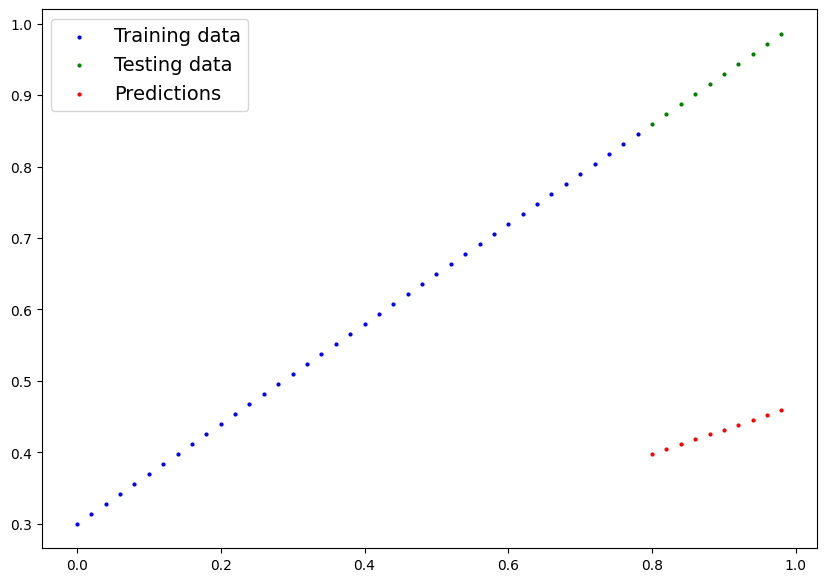

In [20]:
plot_predictions(predictions=y_preds)

summary:
* Model is making random predictions because its receiving random input.
* red line are random predictions not anywhere close to the training data.

## 3. Train model
The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

In our model above, the red dots were not a good representation of the data.

One way to measure how poor or how wrong your models predictions are, is to use a `loss function`.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, **lower is better**.
* **Optimizer:** Takes into account the loss of a model (e.g. how 'wrong it is') and adjusts the **model's parameters** (e.g. *weight & bias*) to improve the loss function.
    * documentation or `torch.optim`: https://pytorch.org/docs/stable/optim.html#module-torch.optim
    * Inside the optimizer you will often have to set 2 parameters:
        * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
        * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step(a small `lr` results in small changes, a large `lr` results in large changes).

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [21]:
# check these with model.parameters()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [22]:
# model's parameters (parameter is value the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Setup a loss function and optimizer
* We will start with the L1 loss function from torch.nn.L1Loss
* This is the same as the `mean absolute error` or `MAE`.
* Documentation: https://pytorch.org/docs/stable/nn.html#loss-functions


* optimizer documentation (torch.optim): https://pytorch.org/docs/stable/optim.html#module-torch.optim

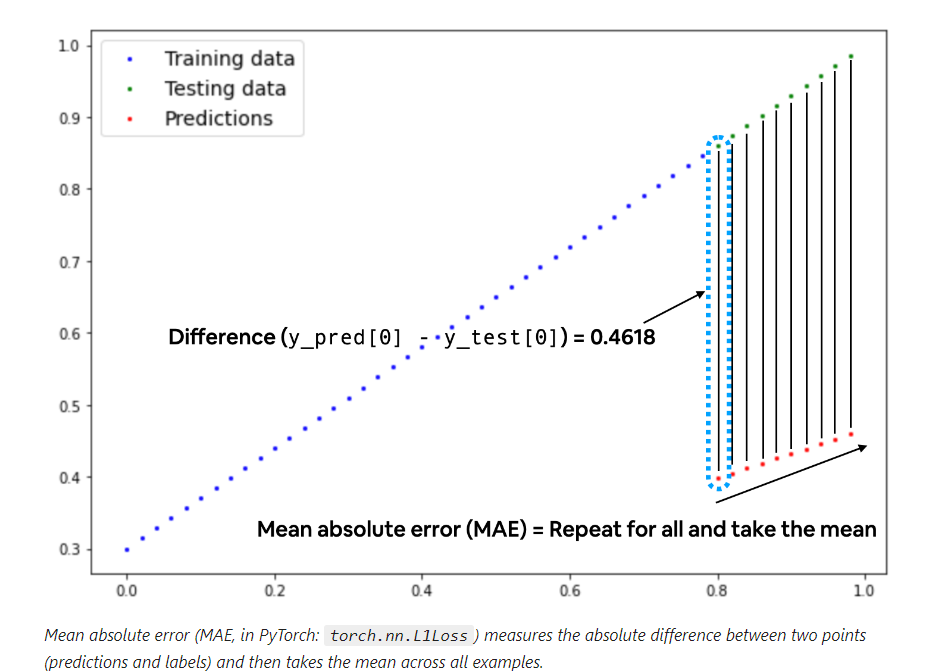

## Using L1Loss (MAE) and SGD
* SGD (stochastic gradient descent) will increase weights to minimize the loss, decrease the bias to minimize the loss. The idea is to optimize the gradient.

In [23]:
# setup a loss function - measures how wrong the model prediction is
loss_fn = nn.L1Loss()


# setup an optimizer - (stochastic gradient descent - SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set!

**Q**: Which loss function and optimizer should I use?
**A**: This is problem specific. With experience, you will get an idea of what works and what doesn't with the specific problem set.

For example, for a regression problem (like the one above), a loss function of `nn.L1Loss()` and and optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is a dog or a cat, you likely will use a loss function of `nn.BCELoss()` (binary cross entropy loss).

# Building a training Loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through network to calculate the gradients of each of the parameters of our model with respect to the loss. (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss. (**gradient descent**)

In [24]:
with torch.no_grad():
  list(model_0.parameters())

In [25]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [26]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

### Unofficial PyTorch Training Loop Song

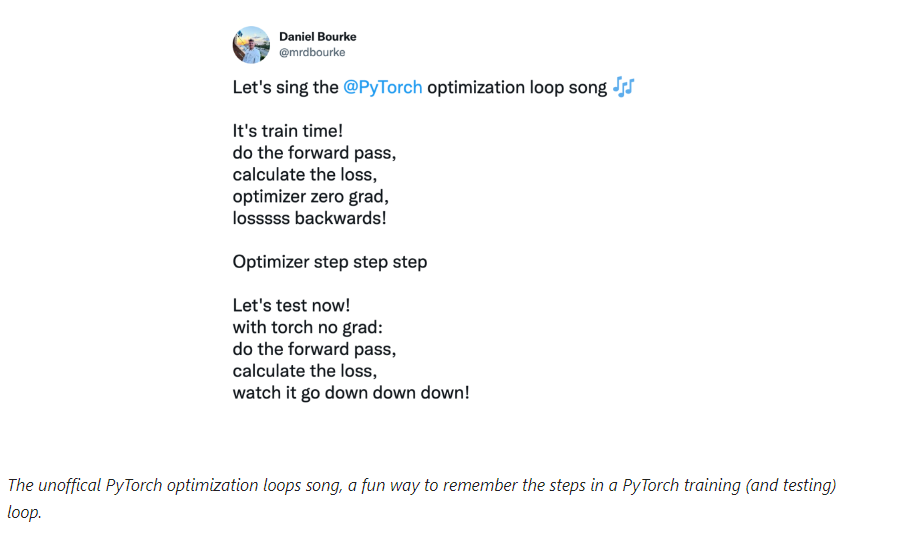

### Another view of Training Loop step by step
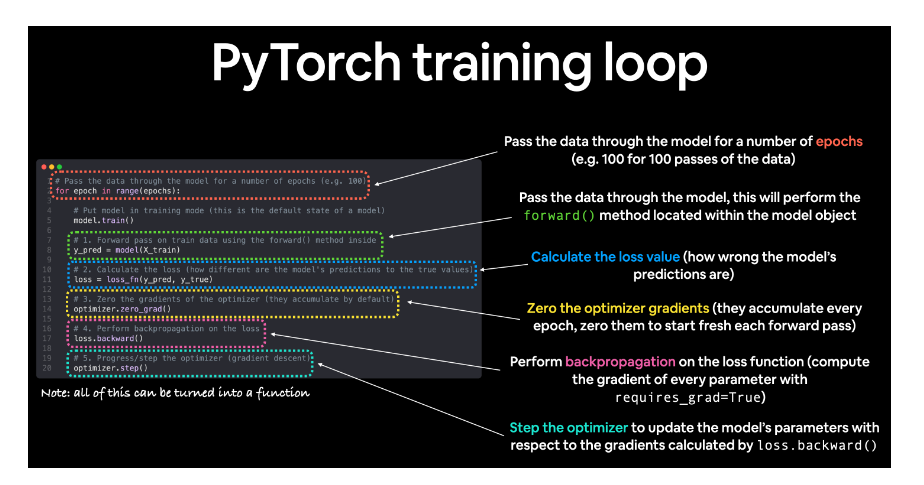

In [27]:
# An epoch is 1 loop through the data...(this is a hyperparameter)
# lets try 200 epochs
epochs = 200

# Track different values to compare experiments
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward Pass - forward propagation
  y_pred = model_0(X_train)

  # 2. Calculate the loss - difference between model predictions and ideal train values
  loss = loss_fn(y_pred, y_train) #input, target
  print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop


  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (e.g. dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple other things behind scenes
  # with torch.no_grad(): # may also see torch.no_grad() in older torch code
    # 1. Do the forward pass in testing mode
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # print out what's happening every 10th epoch
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # print out model state_dict()
    print(model_0.state_dict())

Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.08227583020925522
Loss: 0

summary:
* We can run the training loop above epoch by epoch and we can see with each epoch the loss function decreases each time which is our goal.

In [28]:
# lets look at the epoch_count, loss_values, test_loss_values

import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

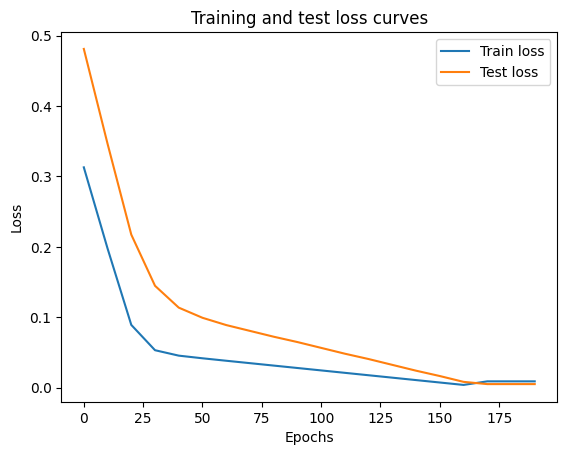

In [29]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [30]:
# make predictions
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [31]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [32]:
weight, bias

(0.7, 0.3)

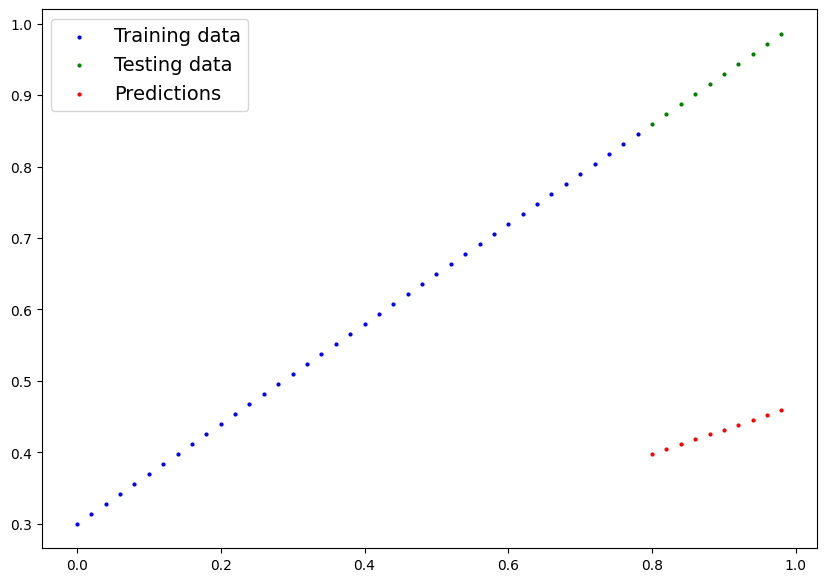

In [33]:
# plot predictions
plot_predictions(predictions=y_preds)

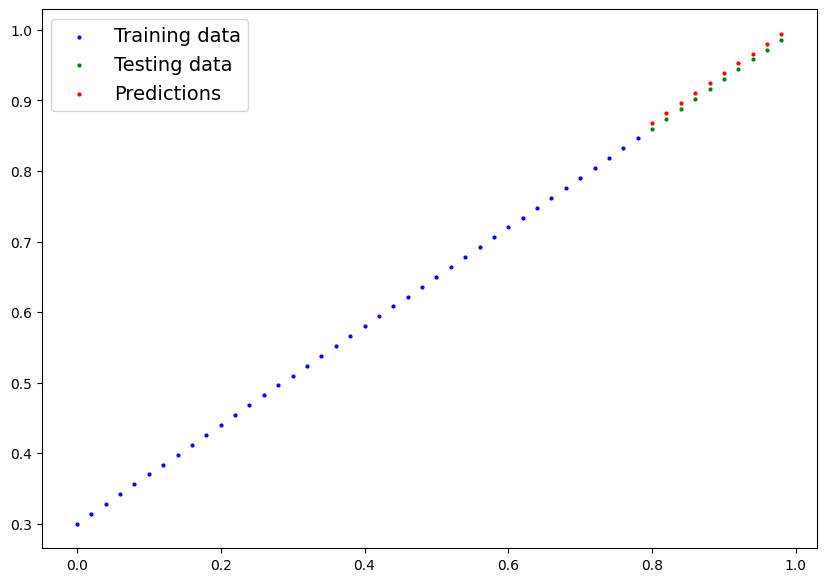

In [34]:
# plot the new predictions after training the model
plot_predictions(predictions=y_preds_new)

summary:
* We can see that with using the torch training loop we are optimizing the gradient descent algorithm and minimizing the loss and our new predictions are getting closer to the actual.
* We can see that we trained it for 200 epochs.
* The red line is now virtually the same as the blue line.
* obviously if we ran this again we would overfit the model, but at least we get the point.

### Saving a model in PyTorch

There are 3 main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format.

2. `torch.load()` - allows you to load a saved PyTorch object.

3. `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state dictionary

* Torch documentation: https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [35]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

What is a state_dict? It is a dictionary that saves the state of your model.

In [36]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path - pytorch objects usually have the extension .pt or .pth
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [37]:
!ls -L models

01_pytorch_workflow_model_0.pth


## Loading a Pytorch model

Since we saved our model's `state_dict()` rather than the entire emodel, we will create a new instance of our model class and load the saved `state_dict()` into that.

In [38]:
# this is what we saved above
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [39]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [40]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [41]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

# look at loaded_model_preds
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [42]:
# compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

## 6. Putting it all together

Let's go back through the steps above and see it all in 1 place!

In [43]:
# Import Pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt


#check pytorch version
torch.__version__

'2.1.0+cu121'

Create device-agnostic code.

This means that if we have access to a GPU, our code will use it (for potentially faster computing).

If no GPU is availale, the code will default to using CPU.

In [44]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 - Data

In [45]:
# Create some dummy data using the linear regression formula of y = weight * X + bias (aka y = mx+b)

# create weights and biases
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) #without unsqueeze errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [46]:
# split data
train_split = int(0.8 * len(X)) #use 80% of samples for training or 0.8
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# lengths
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

summary:
* We have 40 X_train and 40 y_train samples
* We have 10 X_test and 10 y_test samples

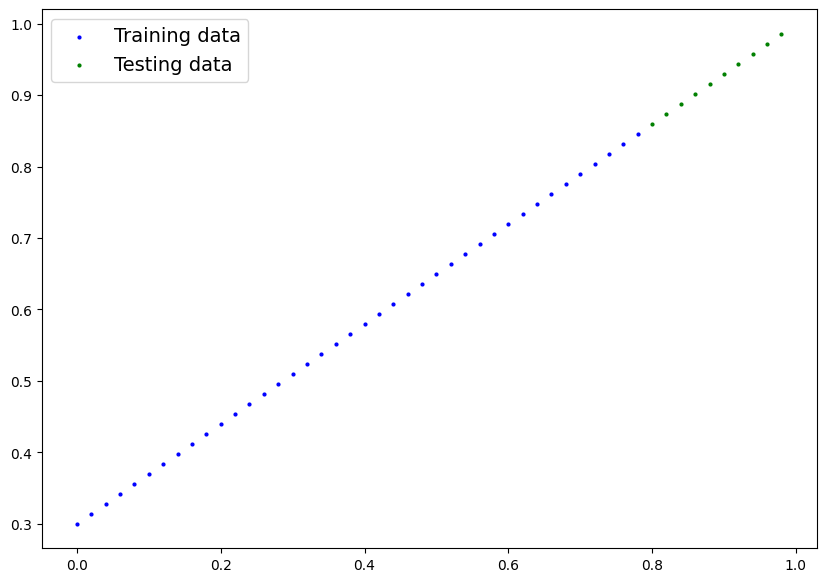

In [47]:
# Plot the data
# use plot_predictions function from above
plot_predictions(X_train, y_train, X_test, y_test)

In [48]:
# video 62

## 6.2 Building a PyTorch Linear Model
* The class `nn.Linear` applies a linear transformation using the "classic" linear regression formula (See docs: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)

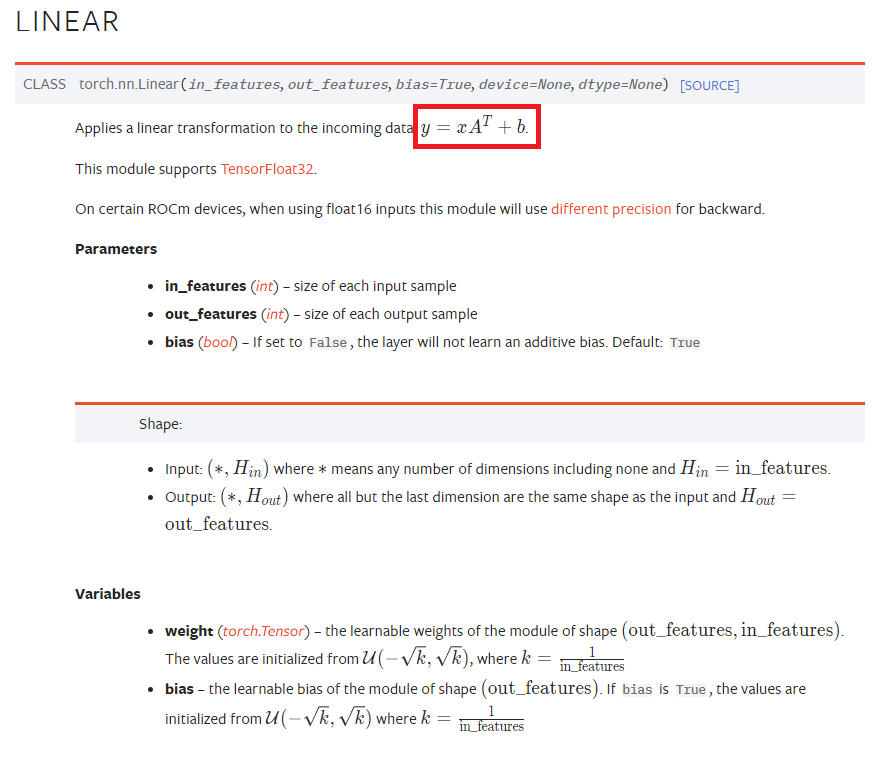

In [51]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the modle parameters / also called: linear transform, probing layer, fully connected layer, dense layer (tensorflow)
    self.linear_layer = nn.Linear(in_features=1, #input size 1
                                  out_features=1) #output size 1

  # Function to take in a torch.Tensor and return a torch.Tensor using python type hints
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set manual seed for reproducibility
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict() #what is in the model

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [50]:
# we have a 1 to 1 relationship in our data
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

* What we did above is use PyTorch built-in functions rather than hardcode the weights and biases. In particular we used the `nn.Linear` function

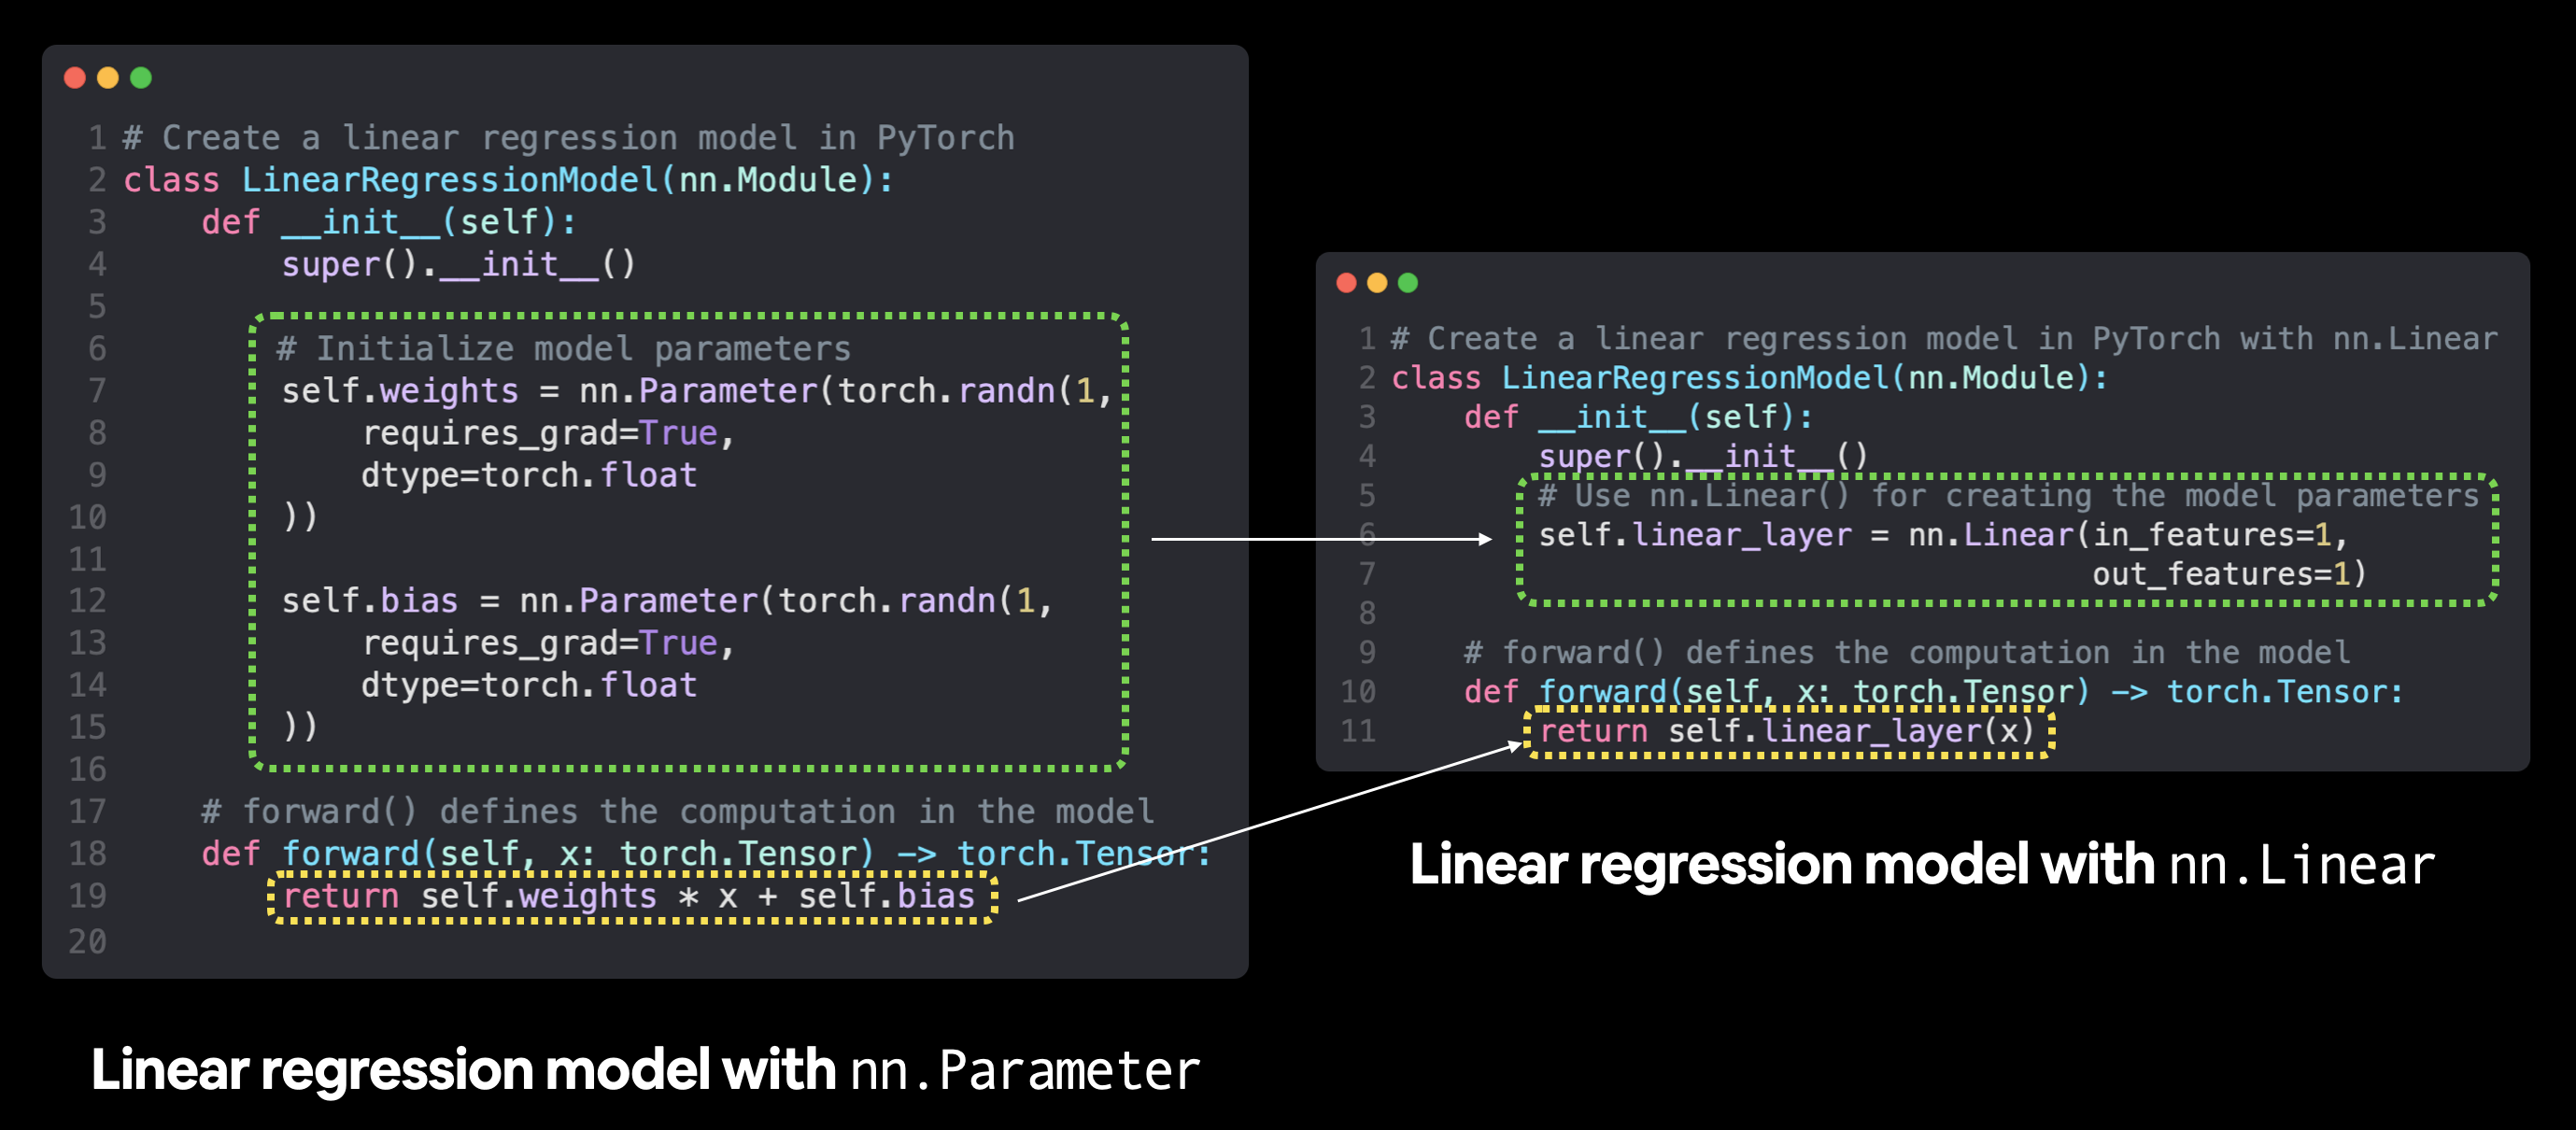

In [52]:
# check model current device
next(model_1.parameters()).device

device(type='cpu')

default is `cpu`

In [54]:
# Set model to use target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [55]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### 6.3 Training

* For training we need:
  1. loss function
  2. optimizer
  3. training loop
  4. testing loop

In [56]:
# setup loss function
loss_fn = nn.L1Loss() # same as MAE

# set up our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01, )

In [62]:
# Lets write a training loop
torch.manual_seed(42) # seed for reproducible results

epochs = 200

# Put data on target device (device agnostic code for data)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
y_train = y_train.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening

  if epoch % 10 == 0 :
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 10 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 20 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 30 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 40 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 50 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 60 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 70 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 80 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 90 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 100 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 110 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.001264503574930

### Evaluate model
* state_dict()

In [63]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [64]:
# previous weight and bias
weight, bias

(0.7, 0.3)

summary:
* We can see our results in the `state_dict` were very close to the original weight/bias

### 6.4 Making and evaluating predictions


In [65]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

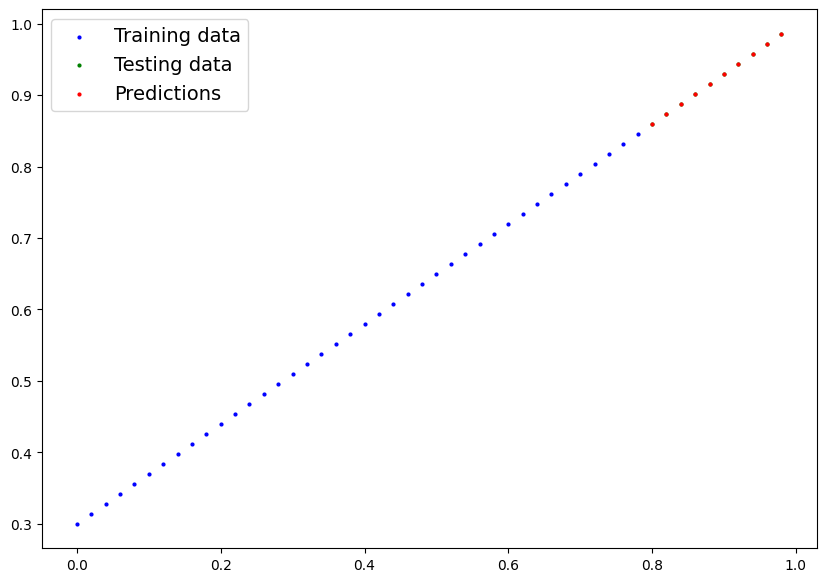

In [66]:
# check out model preds visually
plot_predictions(predictions=y_preds)

### 6.5 Saving and Loading a trained model

In [71]:
from pathlib import Path # need path to save model to

# 1. Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_!.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict()
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH) #f is file path

Saving model to: models/01_pytorch_workflow_model_!.pth


In [72]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [73]:
# Load a PyTorch model


# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the model_1 state_dict()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [74]:
# check params
next(loaded_model_1.parameters()).device

device(type='cpu')

In [75]:
# view state_dict()
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [76]:
# #eval loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

# compare
y_preds == loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])